In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
def species_from_df(df):
    sps = []
    for i in range(len(df)):
        if not pd.isna(df.iloc[i]['Foreground Species']):
            sps += df.iloc[i]['Foreground Species'].split(';')
        if not pd.isna(df.iloc[i]['Background Species']):
            sps += df.iloc[i]['Background Species'].split(';')
    return list(set(sps))

In [3]:
dekuwc_2016 = pd.read_csv('data/processed-files/dekuwc-2016.csv')

In [4]:
embeddings_dir = 'data/embeddings/'
embedding_files = [x for x in os.listdir(embeddings_dir) if x.endswith('npz')]

embedding_files.sort()

all_embeddings = np.array([])
file_indx = 0
all_file_labels = []

for embedding_file in embedding_files:
    npzfile = np.load(os.path.join(embeddings_dir, embedding_file))
    file_embeddings = npzfile['embeddings']
    file_labels = npzfile['labels']

    #file_embeddings = np.mean(file_embeddings, axis=0)

    if all_embeddings.size:
        all_embeddings = np.vstack((all_embeddings, file_embeddings))
    else:
        all_embeddings = file_embeddings
    all_file_labels += [file_indx] * file_embeddings.shape[0]
    file_indx += 1

In [20]:
len(file_labels)

19

In [5]:
select_files = [x.replace('npz', 'mp3') for x in embedding_files]
filtered_df =  dekuwc_2016[dekuwc_2016['Filename'].isin(select_files)]

In [6]:
sps = species_from_df(filtered_df)
sps.sort()

In [7]:
annotation = np.zeros((len(filtered_df), len(sps)), int)

for i in range(len(filtered_df)):
    if not pd.isna(filtered_df.iloc[i]['Foreground Species']):
        file_sps = filtered_df.iloc[i]['Foreground Species'].split(';')
        for sp in file_sps:
            annotation[i, sps.index(sp)] = 1
    if not pd.isna(filtered_df.iloc[i]['Background Species']):
        file_sps = filtered_df.iloc[i]['Background Species'].split(';')
        for sp in file_sps:
            annotation[i, sps.index(sp)] = 1

In [8]:
indx = np.random.randint(len(filtered_df))
print(annotation[indx])
print(filtered_df.iloc[indx])
embedding_files[indx]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Filename                                     1-2016-01-06-14-05-01.mp3
Foreground Species    Grey-backed Camaroptera;Yellow-rumped Tinkerbird
Background Species                                                 NaN
Remarks                                                            NaN
Name: 330, dtype: object


'1-2016-01-06-14-05-01.npz'

In [9]:
sps

['Abyssinian Crimsonwing',
 'African Dusky Flycatcher',
 'African Paradise Flycatcher',
 'Black Cuckoo',
 'Black-backed Puffback',
 'Black-headed Oriole',
 'Black-throated Wattle-eye',
 'Blue-mantled Crested Flycatcher',
 'Brown Woodland Warbler',
 'Cape Robin Chat',
 'Chin-spot Batis',
 'Collared Sunbird',
 'Common Bulbul',
 'Common Drongo',
 'Emerald-spotted Wood Dove',
 'Grey-backed Camaroptera',
 'Grey-capped Warbler',
 'Hadada Ibis',
 "Hartlaub's Turaco",
 'Mountain Yellow Warbler',
 'Northern Double-collared Sunbird',
 'Olive Sunbird',
 'Olive Thrush',
 'Pied Crow',
 'Red-chested Cuckoo',
 "Rüppell's Robin Chat",
 'Silvery-cheeked Hornbill',
 'Spot-flanked Barbet',
 'Tambourine Dove',
 'Tropical Boubou',
 'Variable Sunbird',
 'White-browed Robin Chat',
 'Yellow Bishop',
 'Yellow-breasted Apalis',
 'Yellow-rumped Tinkerbird',
 'Yellow-whiskered Greenbul']

In [10]:
pca = PCA(n_components=np.min([50, all_embeddings.shape[0]]))
all_embeddings_transformed = pca.fit_transform(all_embeddings)

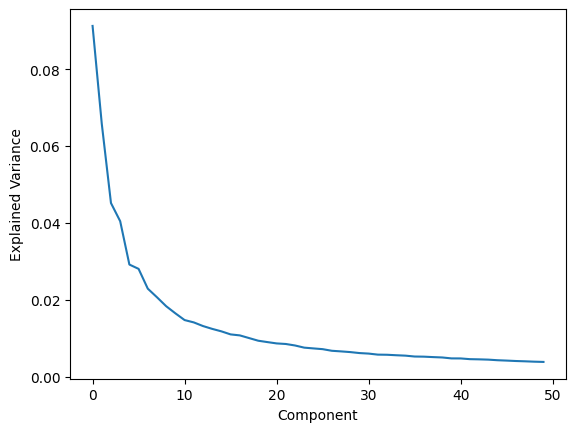

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.ylabel('Explained Variance');

In [12]:
file_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(all_embeddings_transformed)

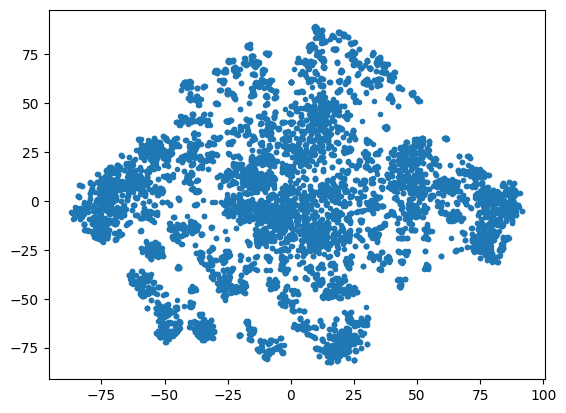

In [13]:
plt.figure()
#for x in set(file_labels):
#    plt.plot(file_tsne[file_labels == x,0], file_tsne[file_labels == x,1], 'x')
#plt.legend(set(file_labels))
plt.plot(file_tsne[:,0], file_tsne[:,1], '.')

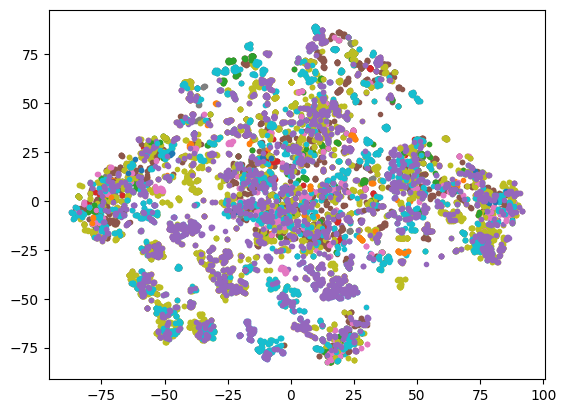

In [14]:
plt.figure()
#for x in set(file_labels):
#    plt.plot(file_tsne[file_labels == x,0], file_tsne[file_labels == x,1], 'x')
#plt.legend(set(file_labels))
for sp in sps[:-1]:
    selection = np.isin(np.array(all_file_labels), np.where(annotation[:,sps.index(sp)]==1)[0])
    plt.plot(file_tsne[selection,0], file_tsne[selection,1], '.')
#plt.legend([sp.split()[0][:2] + sp.split()[1][:2] for sp in sps])

/tmp/ipykernel_6949/2544267473.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


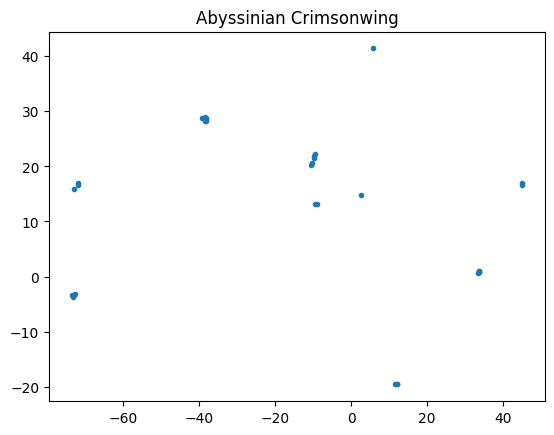

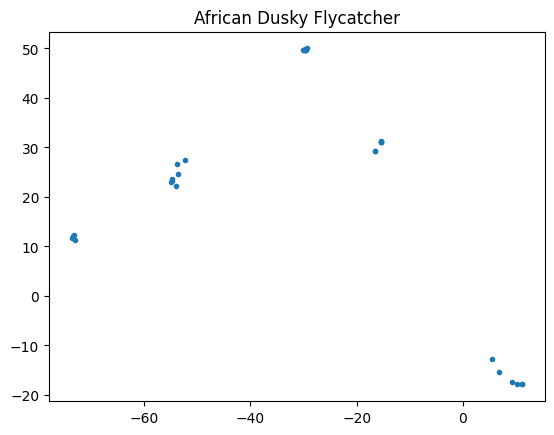

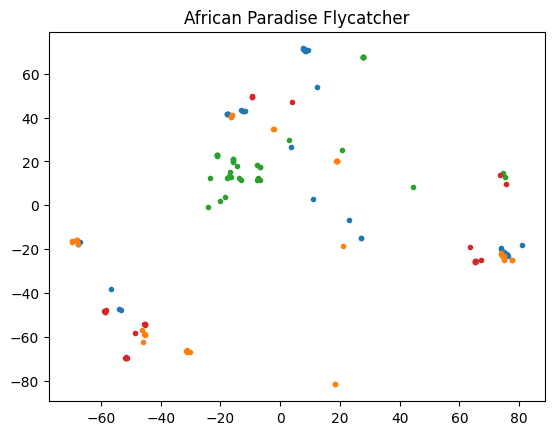

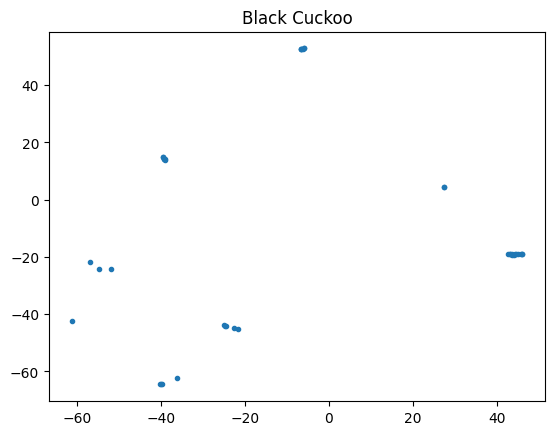

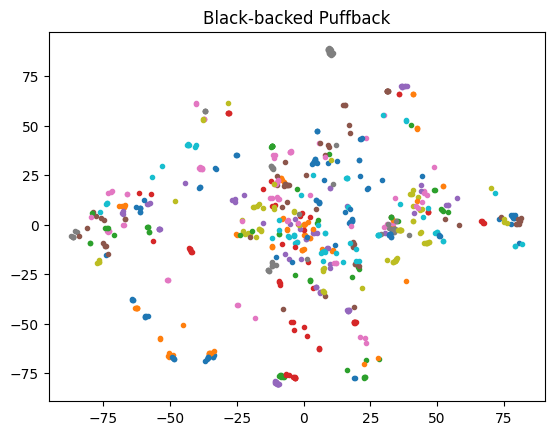

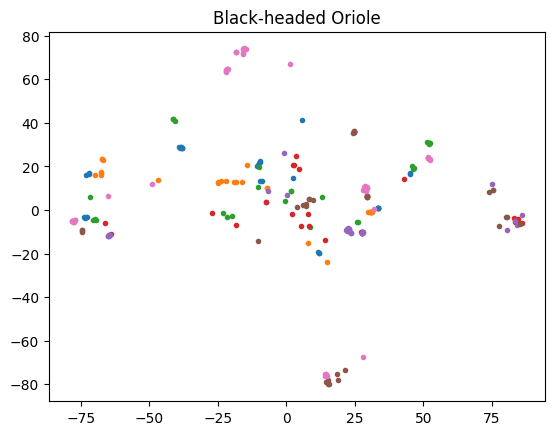

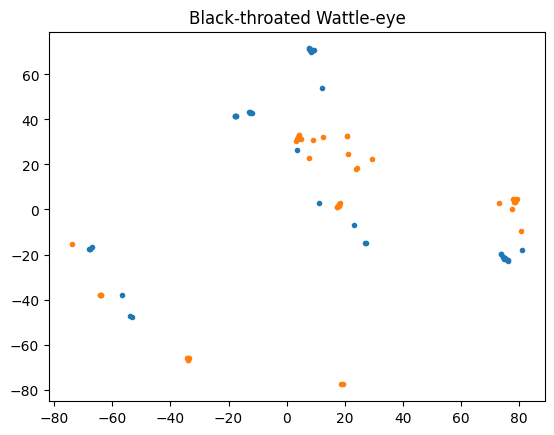

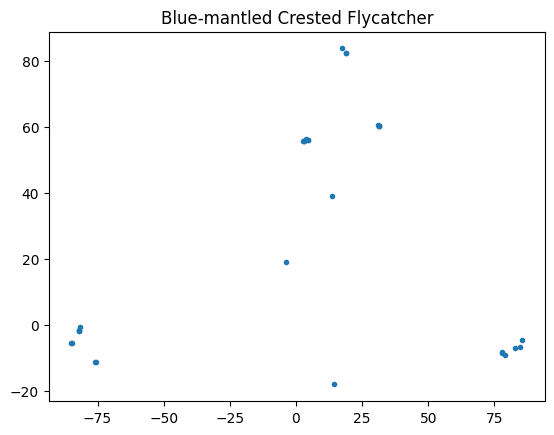

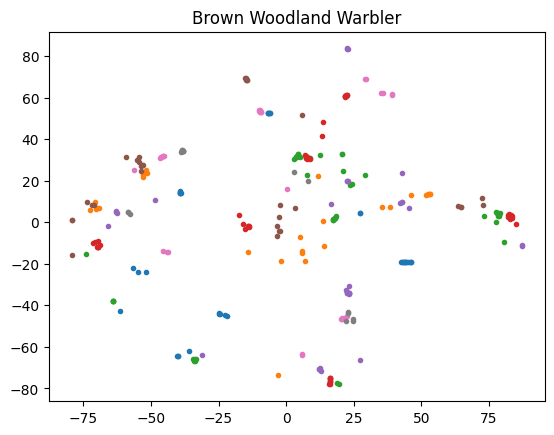

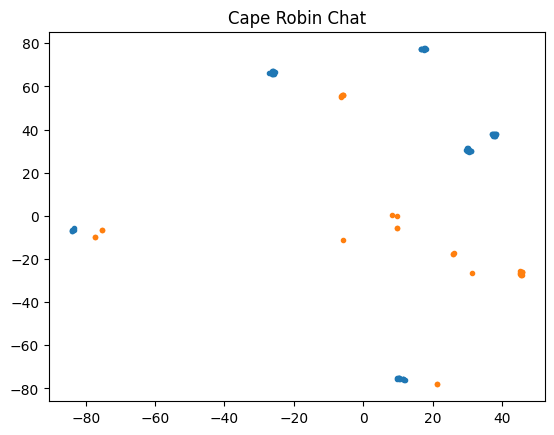

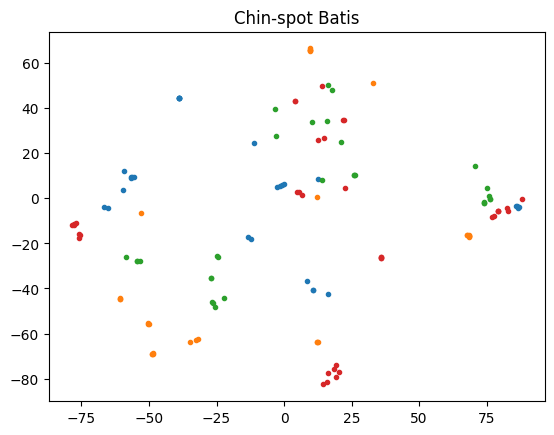

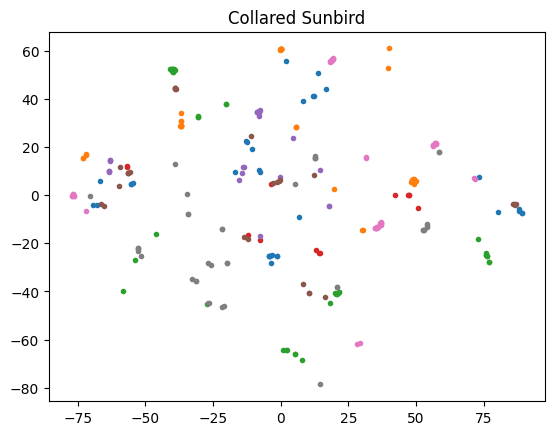

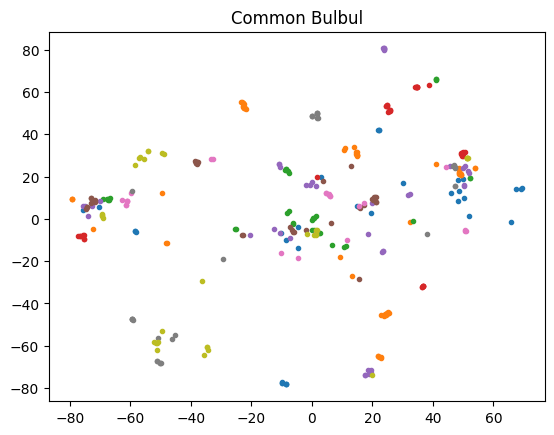

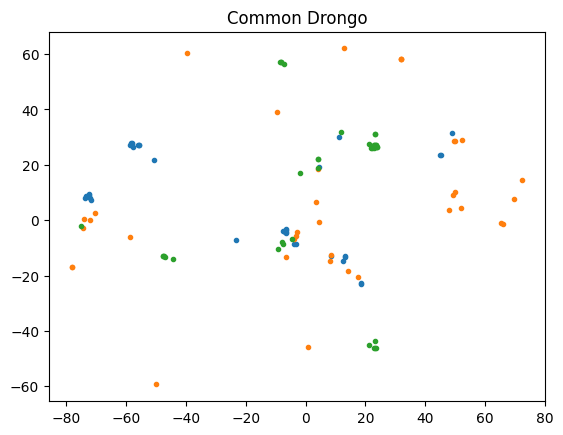

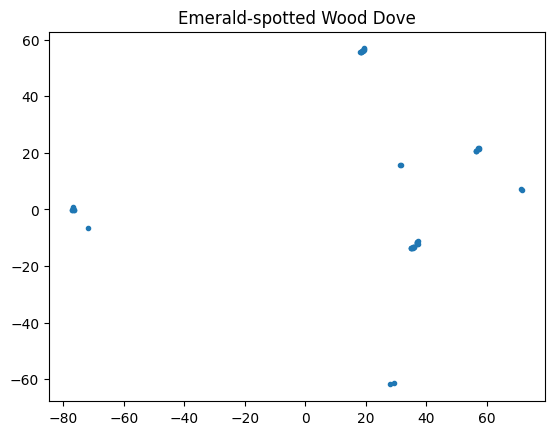

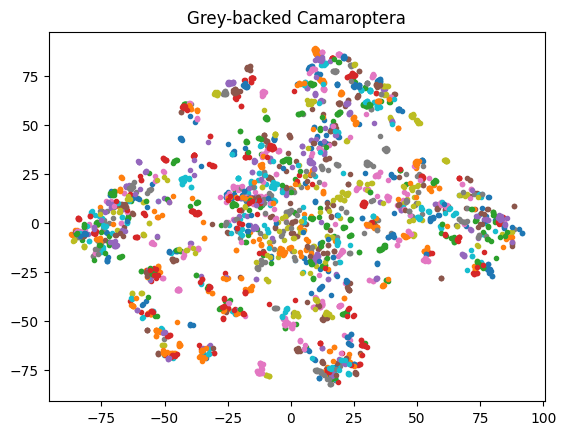

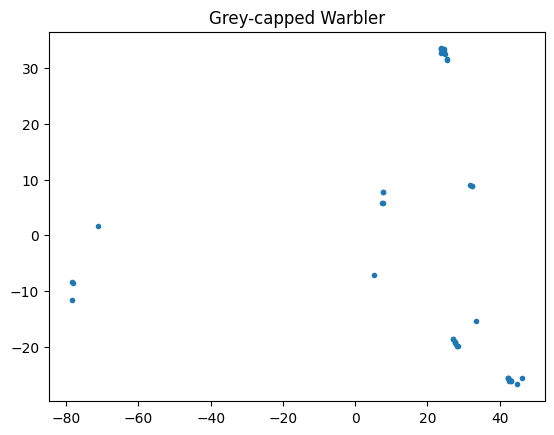

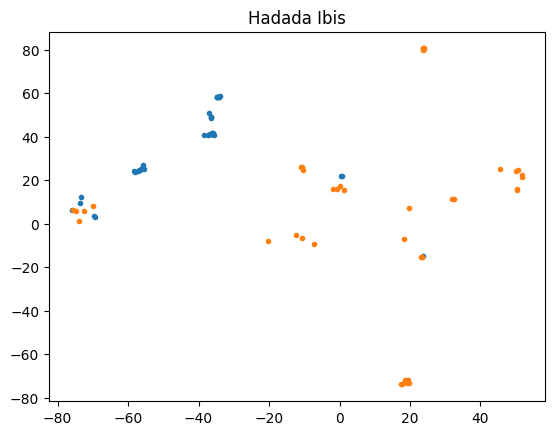

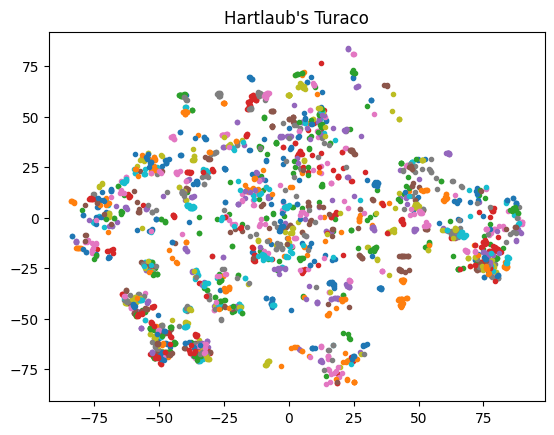

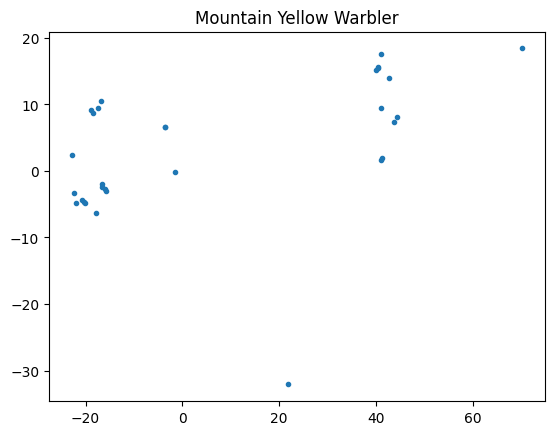

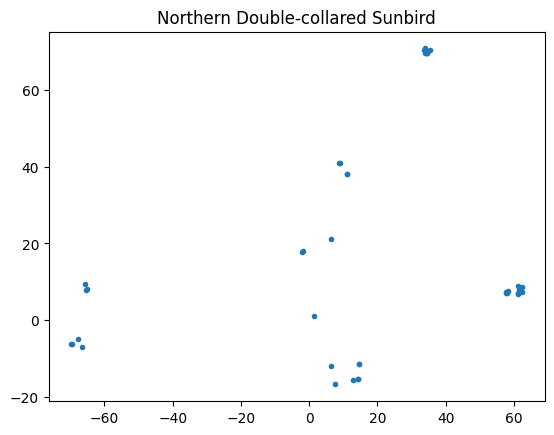

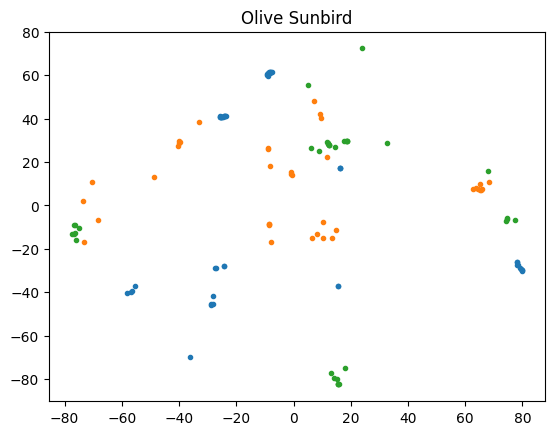

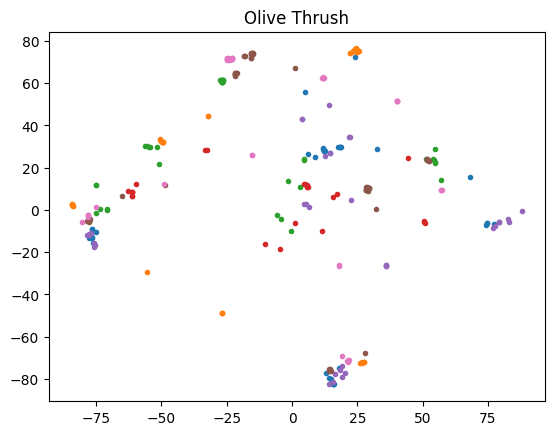

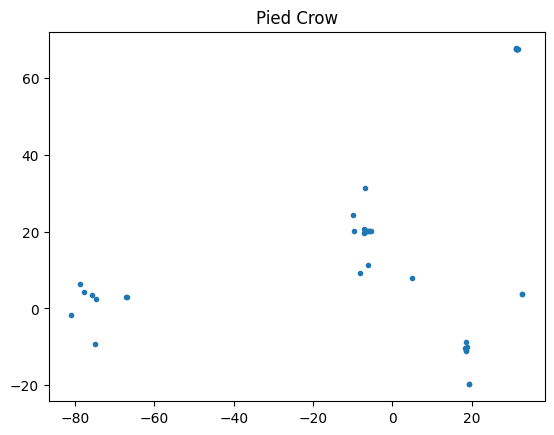

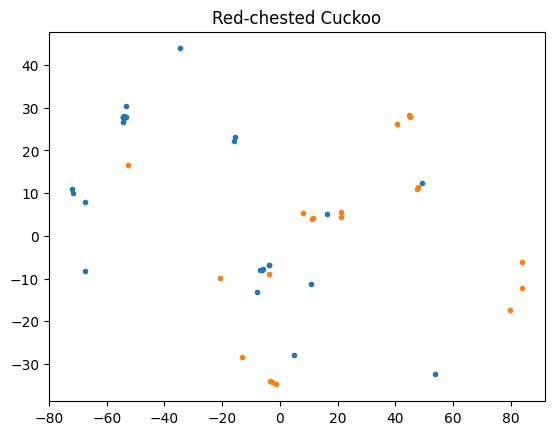

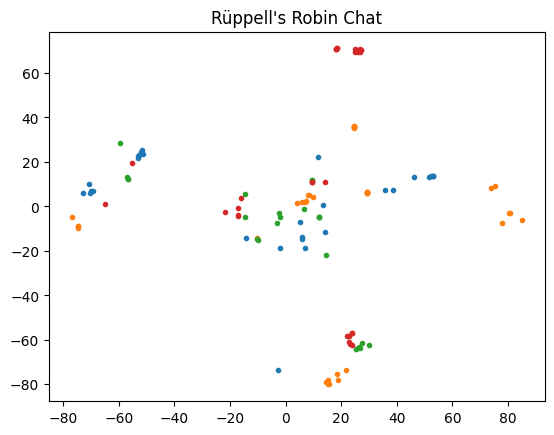

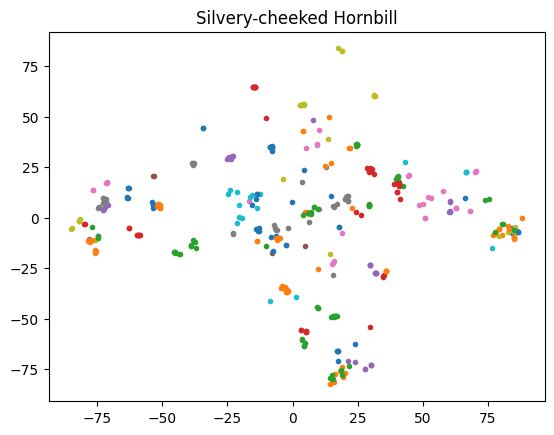

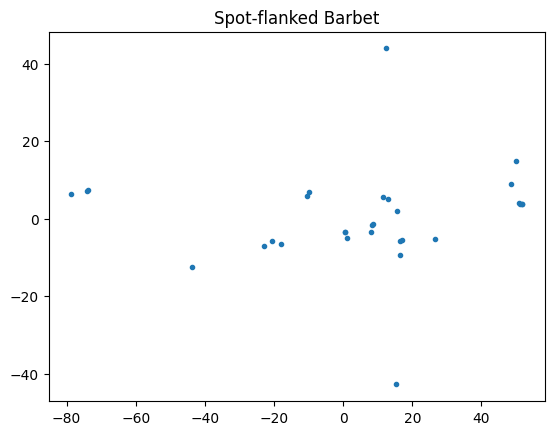

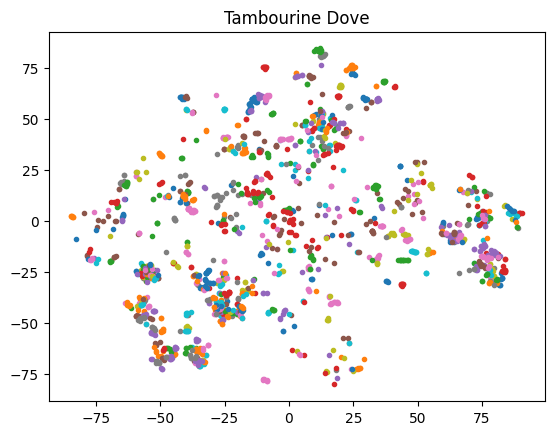

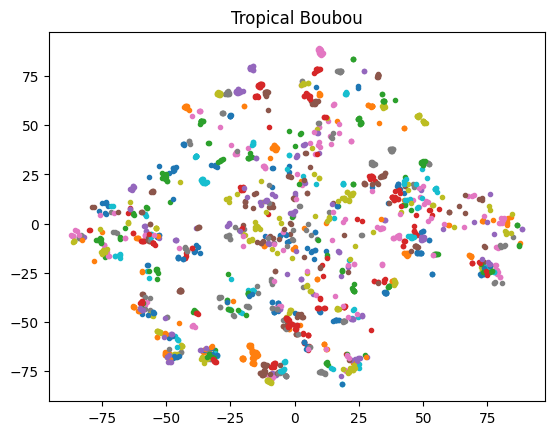

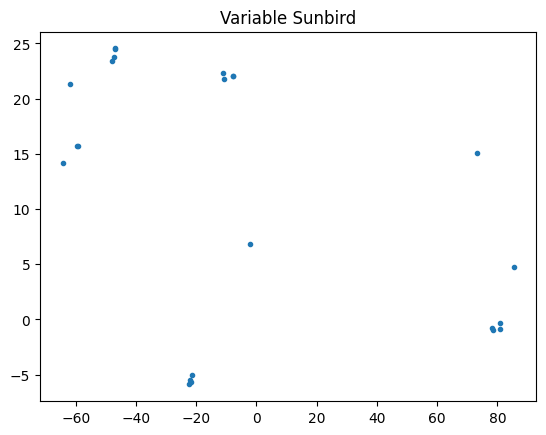

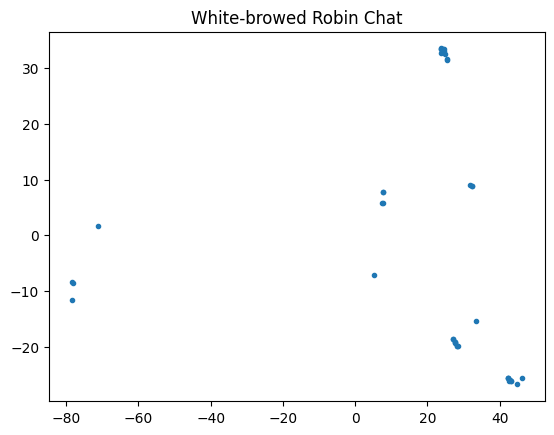

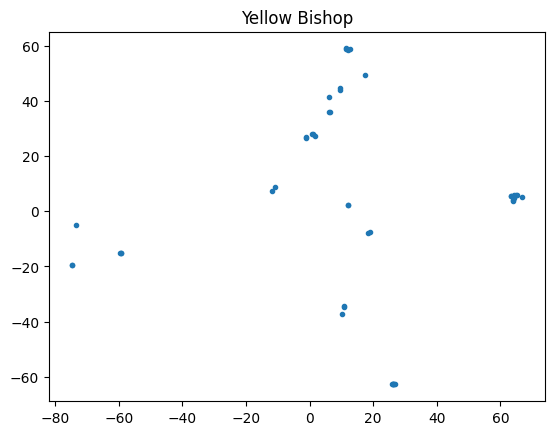

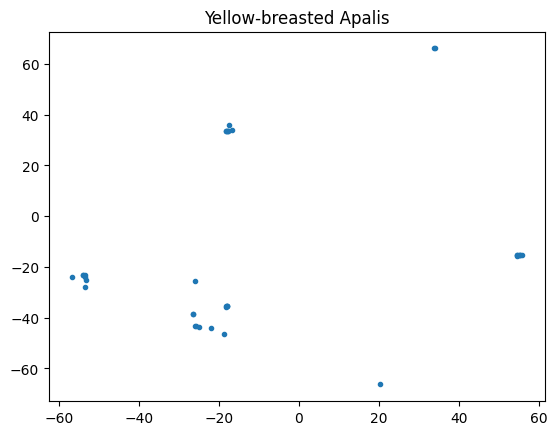

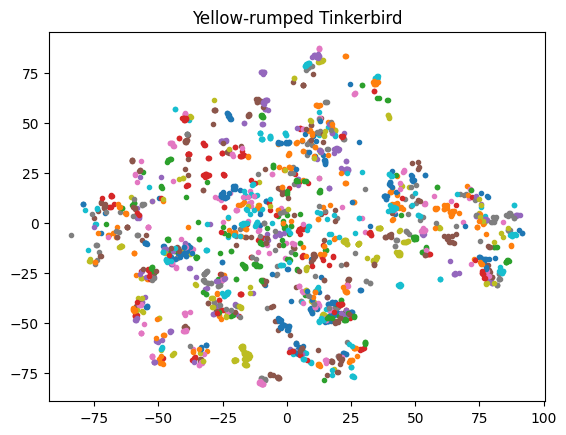

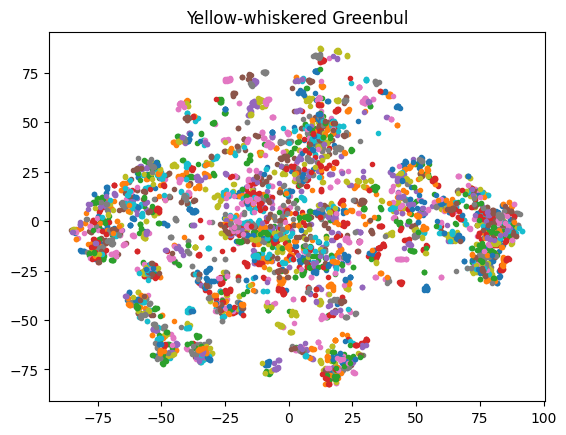

In [15]:
for sp in sps:
    selection = np.isin(np.array(all_file_labels), np.where(annotation[:,sps.index(sp)]==1)[0])
    if sum(selection):
        plt.figure()
        for x in set(np.array(all_file_labels)[selection]):
            plt.plot(file_tsne[np.array(all_file_labels)==x,0], file_tsne[np.array(all_file_labels)==x,1], '.')
        plt.title(sp)

In [16]:
selection.shape

(7859,)

In [17]:
file_embeddings.shape

(19, 1280)

In [18]:
annotation.shape

(212, 36)